#예제 4.1

In [ ]:
# langchain, openAI, neo4j
!pip install langchain==0.3.14
!pip install langchain_openai==0.3.0
!pip install neo4j==5.27.0
!pip install langchain-community==0.3.14

# 예제 4.2


In [ ]:
from langchain_community.graphs import Neo4jGraph
import os

os.environ['OPENAI_API_KEY'] = "" # API 키를 입력하세요.

# 예제 4.3

Results structure: [{'nodes': [{'name': 'Answer', 'indexes': [], 'constraints': ["Constraint( id=19, name='constraint_7e29bbac', type='UNIQUENESS', schema=(:Answer {uuid}), ownedIndex=16 )"]}, {'name': 'Comment', 'indexes': [], 'constraints': ["Constraint( id=20, name='constraint_32ea8862', type='UNIQUENESS', schema=(:Comment {uuid}), ownedIndex=17 )"]}, {'name': 'User', 'indexes': [], 'constraints': ["Constraint( id=21, name='constraint_b13a3b7d', type='UNIQUENESS', schema=(:User {uuid}), ownedIndex=15 )"]}, {'name': 'Question', 'indexes': [], 'constraints': ["Constraint( id=18, name='constraint_401df8db', type='UNIQUENESS', schema=(:Question {uuid}), ownedIndex=13 )"]}, {'name': 'Tag', 'indexes': [], 'constraints': ["Constraint( id=22, name='constraint_64b1b1cf', type='UNIQUENESS', schema=(:Tag {name}), ownedIndex=14 )"]}], 'relationships': [({'name': 'Question', 'indexes': [], 'constraints': ["Constraint( id=18, name='constraint_401df8db', type='UNIQUENESS', schema=(:Question {uuid}

<ipython-input-9-5646b81df122>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


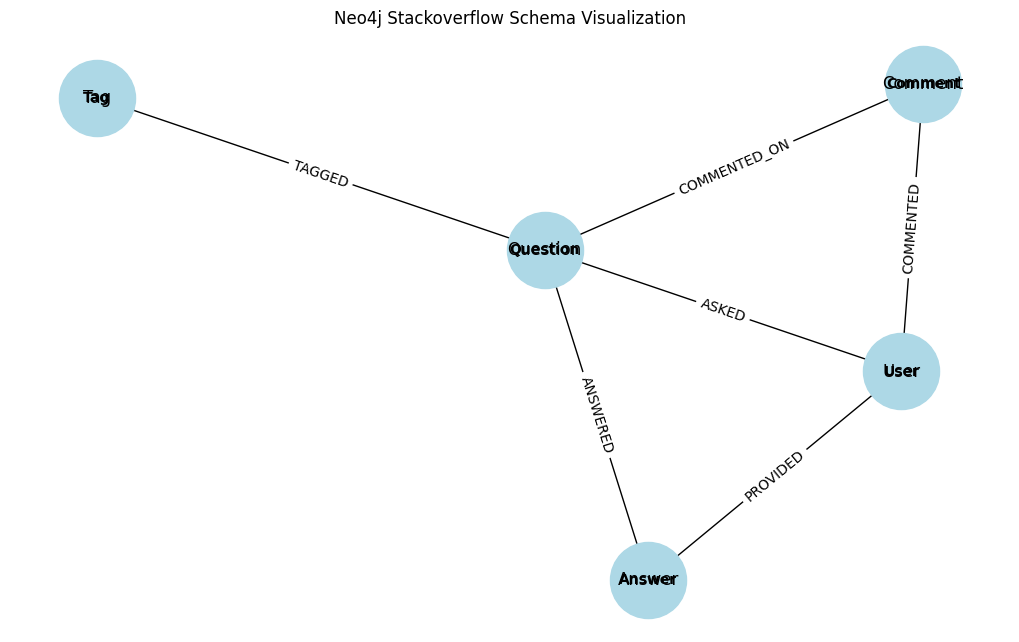

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Neo4jGraph 객체 사용
# neo4j Bolt URL, Username, Password를 입력하세요 #예시
graph = Neo4jGraph(url= "bolt://44.202.189.21:7687" , username="neo4j", password="figures-ability-miner")

# 스키마 가져오기
query = """
CALL db.schema.visualization;
"""
results = graph.query(query)

# 결과 구조 확인
print("Results structure:", results)

# NetworkX 그래프 생성
G = nx.Graph()

# 결과가 리스트의 딕셔너리 형태로 반환됨
for result in results:
    # 노드 추가
    for node in result['nodes']:
        G.add_node(node['name'], name=node['name'])

    # 엣지 추가
    for rel in result['relationships']:
        start_node = rel[0]['name']
        end_node = rel[2]['name']
        rel_type = rel[1]
        G.add_edge(start_node, end_node, name=rel_type)

# 그래프 레이아웃 설정
pos = nx.spring_layout(G)

# 그래프 그리기
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')

# 엣지 레이블 추가
edge_labels = nx.get_edge_attributes(G, 'name')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 노드 레이블 추가
node_labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G, pos, node_labels, font_size=12)

plt.title("Neo4j Stackoverflow Schema Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()


# 예제 4.4

In [ ]:
result = graph.query("""
MATCH (u:User)
WHERE  u.display_name CONTAINS 'ch'
RETURN
    u.display_name AS DisplayName
ORDER BY u.display_name DESC
LIMIT 3""")

print(result)

[{'DisplayName': 'vyaches'}, {'DisplayName': 'vasant kumar chinnipilli'}, {'DisplayName': 'tzach'}]


#예제4.5

In [ ]:
# 그래프 내부 고유 노드 레이블(DISTINCT) 조회
result = graph.query("""
MATCH (n)
RETURN
    DISTINCT labels(n) AS Labels
LIMIT 100""")
print(result)

[{'Labels': ['Question']}, {'Labels': ['User']}, {'Labels': ['Tag']}, {'Labels': ['Answer']}, {'Labels': ['Comment']}]


#예제 4.6

In [ ]:
# ‘User’ 노드ID 카운트
result = graph.query("""
MATCH (n:User)
WITH
    count(DISTINCT elementId(n)) AS Node_Unique_Count
RETURN
    Node_Unique_Count """)
print(result)

[{'Node_Unique_Count': 1366}]


#예제 4.7

In [ ]:
# ‘User’ 노드 1개 살펴보기
result = graph.query("""
MATCH (n:User)
RETURN
    elementId(n) AS NodeID,
    labels(n) AS Labels,
    keys(n) AS key,
    properties(n) AS Properties,
    size(keys(n)) AS PropertyCount
LIMIT 1 """)
print(result)

[{'NodeID': '4:b3bc83cd-9c04-4b3b-9294-f7efd126b59d:604', 'Labels': ['User'], 'key': ['uuid', 'display_name'], 'Properties': {'display_name': 'schernichkin', 'uuid': 2236092}, 'PropertyCount': 2}]
